## Analise dos retornos do métado Bandas de Bollinger

In [1]:
# Importando as Bibliotecas

import pandas as pd
import numpy as np 
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as fplt
from datetime import date


import warnings
warnings.filterwarnings('ignore')

In [21]:
# dados iniciais

# datas
inicio = '2021-01-01'
fim = '2023-05-20'

# nome da ação 

nome = 'BTC-USD'

In [22]:
# baixando os dados da ação 

df = yf.download(nome , start = inicio , end = fim)

[*********************100%***********************]  1 of 1 completed


In [23]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


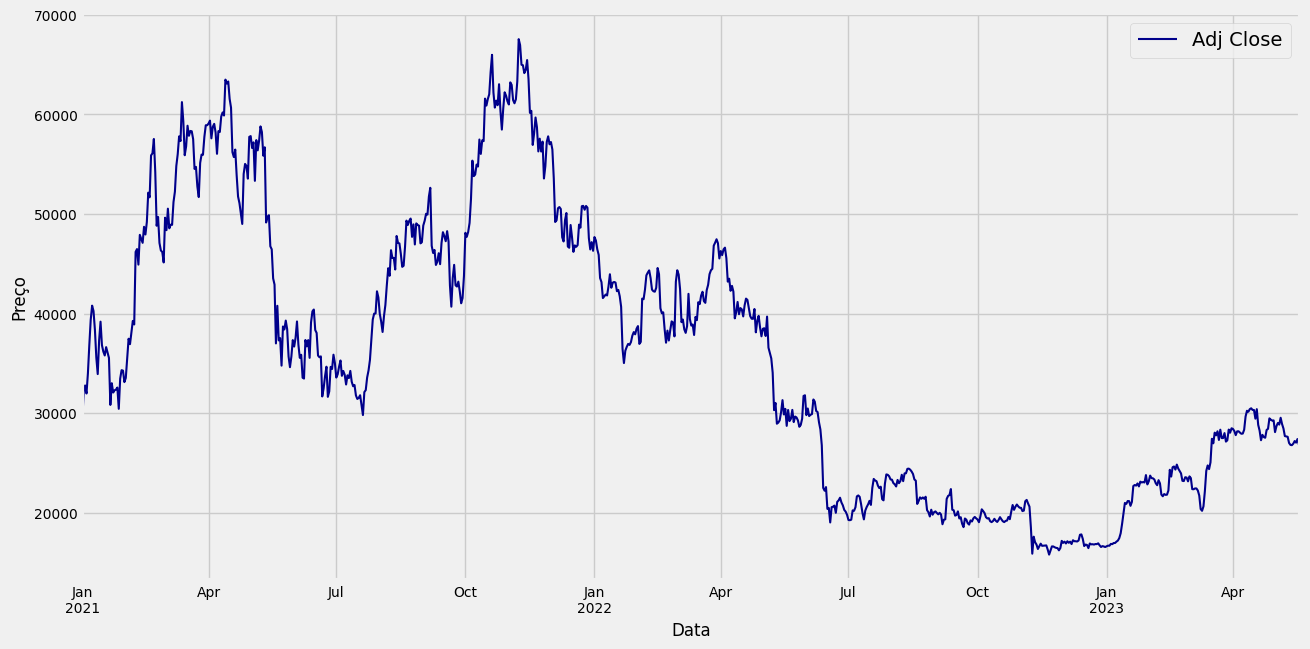

In [24]:
# Primeiro gráfico 

df['Adj Close'].plot(grid = True , figsize = (14,7) , linewidth = 1.5, fontsize = 10, color = 'darkblue')
plt.xlabel('Data',
            fontsize = 12);
plt.ylabel('Preço',
            fontsize = 12);
plt.legend();

In [25]:
# Calculando  as Bandas de Bollinger

# Parametros Iniciais 
periodo = 21
desvios= 2

df['desvio'] = df['Adj Close'].rolling(periodo).std() # calculando o desvio padrao médio do 'periodo'
df['MM'] = df['Adj Close'].rolling(periodo).mean()
df['banda_sup'] = df['MM'] + (df['desvio']*desvios)
df['banda_inf'] = df['MM'] - (df['desvio']*desvios)

In [26]:
# filtrand os valores missing 

df = df.dropna(axis = 0)

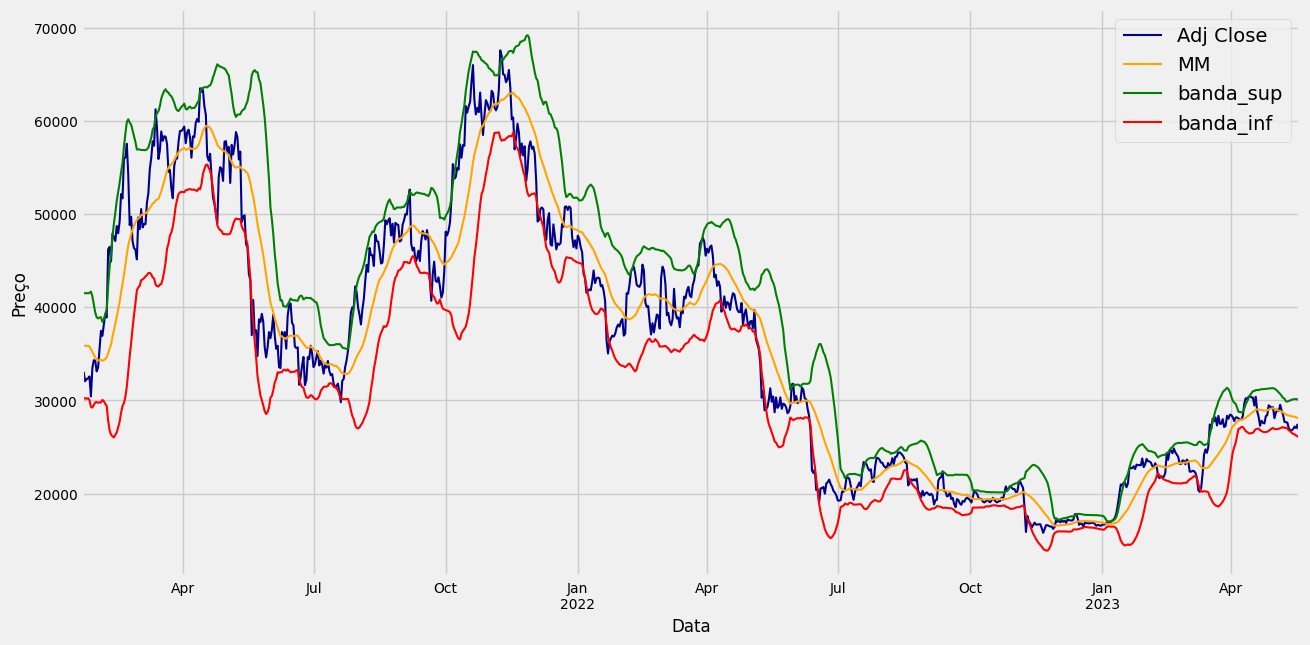

In [27]:
# Plotando um gráfico com todos os parámetros 

df[['Adj Close', 'MM','banda_sup','banda_inf']].plot(grid = True ,
                                                     figsize = (14,7) , linewidth = 1.5, fontsize = 10,
                                                     color = ['darkblue' , 'orange', 'green','red'])
plt.xlabel('Data',
            fontsize = 12);
plt.ylabel('Preço',
            fontsize = 12);
plt.legend();

In [28]:
# Construção dos alvos

periodos = 1 

# Alvo 1 - Retorno
df.loc[:, 'Retorno'] = df['Adj Close'].pct_change(periodos)
df.loc[:, 'Alvo'] = df['Retorno'].shift(-periodos)

In [29]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,desvio,MM,banda_sup,banda_inf,Retorno,Alvo
Date,,,,,,,,,,,,
2021-01-21,35549.398438,35552.679688,30250.750000,30825.699219,30825.699219,75643067688,3089.284876,35700.628999,41879.198751,29522.059248,NaN,0.070722
2021-01-22,30817.625000,33811.851562,28953.373047,33005.761719,33005.761719,77207272511,2806.096895,35873.562779,41485.756570,30261.368988,0.070722,-0.028423
2021-01-23,32985.757812,33360.976562,31493.160156,32067.642578,32067.642578,48354737975,2810.104333,35870.723493,41490.932160,30250.514827,-0.028423,0.006915
2021-01-24,32064.376953,32944.007812,31106.685547,32289.378906,32289.378906,48643830599,2839.085515,35847.264230,41525.435260,30169.093200,0.006915,0.002385
2021-01-25,32285.798828,34802.742188,32087.787109,32366.392578,32366.392578,59897054838,2813.350757,35866.048921,41492.750434,30239.347408,0.002385,0.006286


In [30]:
df = df.dropna(axis=0)

In [31]:
# Criando regras de Trade
df.loc[:, 'Regra'] = np.where(df.loc[:, 'Adj Close'] > df.loc[:, 'banda_sup'], 1 ,0)
df.loc[:, 'Regra'] = np.where(df.loc[:, 'Adj Close'] < df.loc[:, 'banda_inf'], -1 , df.loc[:, 'Regra'])

In [32]:
# Aplicando a regra no alvo

df.loc[:, 'Trade'] = df.loc[:, 'Regra']*df.loc[:,'Alvo']

In [33]:
# Calculando o resultado acumulado em juros simples

df.loc[:, 'Retorno_Trade_BB'] = df['Trade'].cumsum()

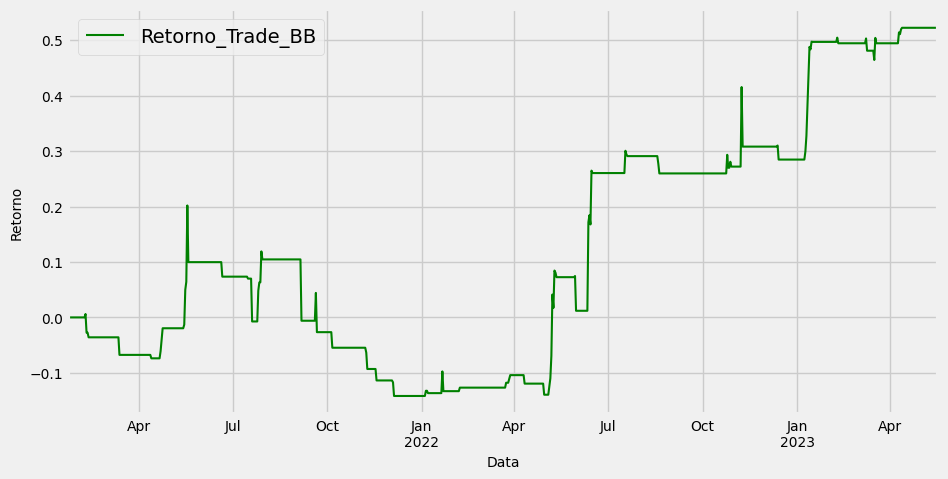

In [34]:
df['Retorno_Trade_BB'].plot(grid = True , figsize = (10,5) , linewidth = 1.5, fontsize = 10, color = 'green')
plt.xlabel('Data',fontsize = 10)
plt.ylabel('Retorno',fontsize = 10)
plt.legend();

## utilizando o mplfinance para plotar os gŕaficos

In [39]:
# pegando apenas o os ultmo  ano do data frame , para uma melhor compreenssão do grafico

df2 = df.loc['2023-01-01':'2023-12-31']

In [49]:
# utilizando o mplfinance para plotar os gŕaficos

# Adicionando os paremetros do BB no gŕafico 

setup = fplt.make_mpf_style(mavcolors = ['yellow','darkbkue']
                                         , base_mpl_style = 'fivethirtyeight')
bb = fplt.make_addplot(df2[['MM','banda_sup','banda_inf']])

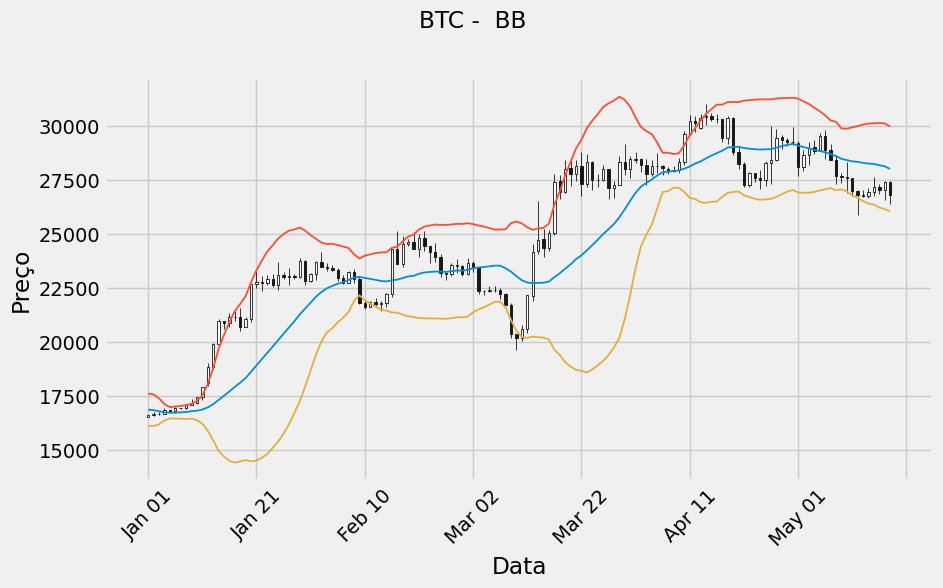

In [50]:
#Gráfico bb 

fplt.plot(
       df2
      , type = 'candle'
      , title = 'BTC -  BB'
      , ylabel = 'Preço'
      , xlabel = 'Data'
      , style = setup
      , figratio = (12,6) # tamanho do grafico
      , addplot = bb
)

In [51]:
# Gerando sinal 

df2.loc[:, 'sinal_inf'] = np.where((df2.loc[:, 'Close'] < df2.loc[:, 'banda_inf'])
                                   , df2.loc[:, 'Close']*0.99
                                   , np.nan)

df2.loc[:, 'sinal_sup'] = np.where((df2.loc[:, 'Close'] > df2.loc[:, 'banda_sup'])
                                   , df2.loc[:, 'Close']*1.01
                                   , np.nan)

In [52]:
# Cria o vetor de indicadores 

indicadores = [fplt.make_addplot(df2['sinal_inf'], type = 'scatter', markersize = 50, marker= '^', color = 'green')
              , fplt.make_addplot(df2['sinal_sup'], type = 'scatter', markersize = 50, marker= 'v', color = 'red')
              , fplt.make_addplot(df2[['MM','banda_sup','banda_inf']] , color = 'darkblue')
              ]

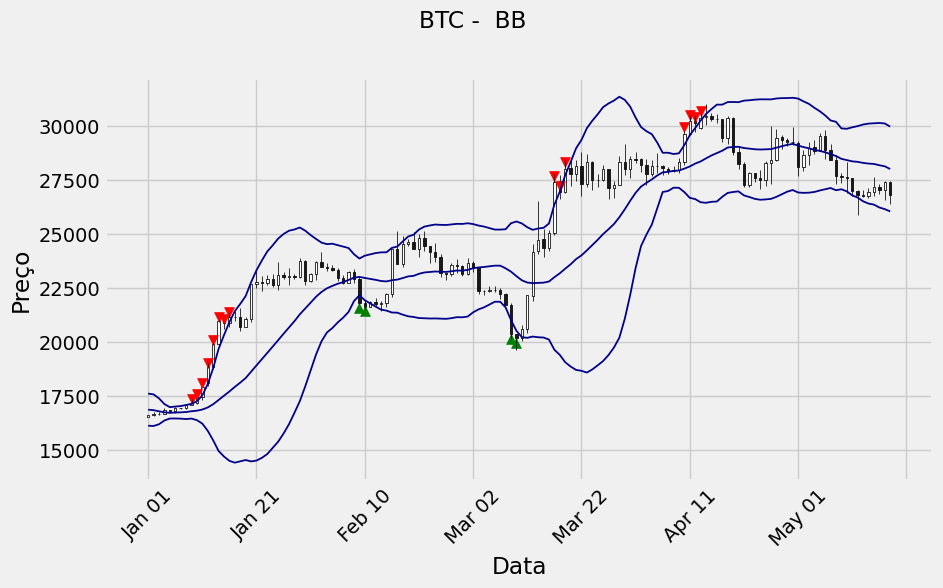

In [53]:
#Gráfico bb 

fplt.plot(
       df2
      , type = 'candle'
      , title = 'BTC -  BB'
      , ylabel = 'Preço'
      , xlabel = 'Data'
      , style = setup
      , figratio = (12,6) # tamanho do grafico
      , addplot = indicadores
)